In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as ans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
dataku = pd.read_csv('/content/echocardiogram.data', error_bad_lines=False, header=None)

dataku.head

<ipython-input-31-bc8b61f11cd4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataku = pd.read_csv('/content/echocardiogram.data', error_bad_lines=False, header=None)
Skipping line 50: expected 13 fields, saw 14



<bound method NDFrame.head of       0   1   2   3      4       5      6     7      8      9     10 11 12
0     11   0  71   0  0.260       9  4.600    14      1      1  name  1  0
1     19   0  72   0  0.380       6  4.100    14  1.700  0.588  name  1  0
2     16   0  55   0  0.260       4  3.420    14      1      1  name  1  0
3     57   0  60   0  0.253  12.062  4.603    16  1.450  0.788  name  1  0
4     19   1  57   0  0.160      22  5.750    18  2.250  0.571  name  1  0
..   ...  ..  ..  ..    ...     ...    ...   ...    ...    ...   ... .. ..
126  7.5   1  64   0   0.24    12.9   4.72    12      1  0.857  name  ?  ?
127   41   0  64   0   0.28    5.40   5.47    11   1.10  0.714  name  ?  ?
128   36   0  69   0   0.20    7.00   5.05  14.5   1.21  0.857  name  ?  ?
129   22   0  57   0   0.14    16.1   4.36    15   1.36  0.786  name  ?  ?
130   20   0  62   0   0.15       0   4.51  15.5  1.409  0.786  name  ?  ?

[131 rows x 13 columns]>

In [32]:
df = ['Months', 'Living', 'Onset', 'PericardialEffusion', 'FrationalShortening', 'Epss', 'Lvdd', 'WallMotionScore', 'WallMotionIndex', 'Mult', 'Name', 'Group', '1Year']
dataku = pd.read_csv('/content/echocardiogram.data', on_bad_lines='skip', header=None, names=df)

dataku.head(6)

,Months,Living,Onset,PericardialEffusion,FrationalShortening,Epss,Lvdd,WallMotionScore,WallMotionIndex,Mult,Name,Group,1Year
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
5,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0


In [33]:
dataku.drop('Name', axis=1, inplace=True)

In [34]:
# Identifikasi nilai '?' dalam DataFrame
missing_values = dataku == '?'

# Hitung rata-rata dari kolom 'Living' sebagai pengganti nilai '?'
average_life = dataku['Living'][~missing_values['Living']].astype(float).mean()

# Gantikan nilai '?' dalam setiap kolom dan baris dengan nilai rata-rata kolom 'Living'
for column in dataku.columns:
    dataku[column] = dataku[column].replace('?', average_life).astype(float)

# Menampilkan DataFrame setelah penggantian
print("DataFrame setelah mengganti nilai '?' dengan rata-rata kolom 'Living':")
print(dataku)

DataFrame setelah mengganti nilai '?' dengan rata-rata kolom 'Living':
     Months  Living  Onset  PericardialEffusion  FrationalShortening    Epss  \
0      11.0     0.0   71.0                  0.0                0.260   9.000   
1      19.0     0.0   72.0                  0.0                0.380   6.000   
2      16.0     0.0   55.0                  0.0                0.260   4.000   
3      57.0     0.0   60.0                  0.0                0.253  12.062   
4      19.0     1.0   57.0                  0.0                0.160  22.000   
..      ...     ...    ...                  ...                  ...     ...   
126     7.5     1.0   64.0                  0.0                0.240  12.900   
127    41.0     0.0   64.0                  0.0                0.280   5.400   
128    36.0     0.0   69.0                  0.0                0.200   7.000   
129    22.0     0.0   57.0                  0.0                0.140  16.100   
130    20.0     0.0   62.0                  0.0  

In [35]:
from sklearn.preprocessing import MinMaxScaler

print('Data sebelum normalisasi: ')
print(dataku)

scaler = MinMaxScaler()
dataku_ternormalisasi = scaler.fit_transform(dataku)

print('Data setelah di normalisasi')
print(dataku_ternormalisasi)

Data sebelum normalisasi: 
     Months  Living  Onset  PericardialEffusion  FrationalShortening    Epss  \
0      11.0     0.0   71.0                  0.0                0.260   9.000   
1      19.0     0.0   72.0                  0.0                0.380   6.000   
2      16.0     0.0   55.0                  0.0                0.260   4.000   
3      57.0     0.0   60.0                  0.0                0.253  12.062   
4      19.0     1.0   57.0                  0.0                0.160  22.000   
..      ...     ...    ...                  ...                  ...     ...   
126     7.5     1.0   64.0                  0.0                0.240  12.900   
127    41.0     0.0   64.0                  0.0                0.280   5.400   
128    36.0     0.0   69.0                  0.0                0.200   7.000   
129    22.0     0.0   57.0                  0.0                0.140  16.100   
130    20.0     0.0   62.0                  0.0                0.150   0.000   

      Lvdd  

In [36]:
print(dataku.duplicated())
print()
print('Data duplikat: ')
print(dataku[dataku.duplicated(keep = False)])

0      False
1      False
2      False
3      False
4      False
       ...  
126    False
127    False
128    False
129    False
130    False
Length: 131, dtype: bool

Data duplikat: 
Empty DataFrame
Columns: [Months, Living, Onset, PericardialEffusion, FrationalShortening, Epss, Lvdd, WallMotionScore, WallMotionIndex, Mult, Group, 1Year]
Index: []


In [37]:
missing_value = dataku.isnull().sum()
print('Jumlah data hilang pada setiap kolom: ')
missing_value

Jumlah data hilang pada setiap kolom: 


Months                 0
Living                 0
Onset                  0
PericardialEffusion    0
FrationalShortening    0
Epss                   0
Lvdd                   0
WallMotionScore        0
WallMotionIndex        0
Mult                   0
Group                  0
1Year                  0
dtype: int64

Atribut penting:
[0.7884066  0.06720535 0.         0.02307963 0.06053205 0.
 0.         0.         0.06077637 0.         0.        ]


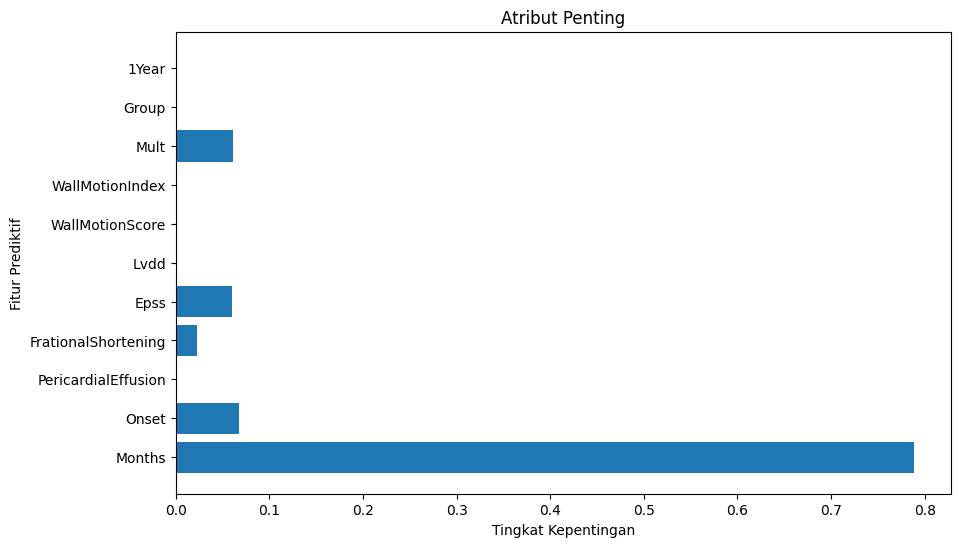

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Memisahkan atribut dan target
X = dataku.drop('Living', axis=1)  # Asumsikan 'Living' adalah atribut target
k = dataku['Living']

# Membuat model
model = DecisionTreeClassifier()

# Melatih model
model.fit(X, k)

# Menghitung tingkat kepentingan atribut
feature_importances = model.feature_importances_

# Menampilkan atribut penting
print("Atribut penting:")
print(feature_importances)

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur Prediktif')
plt.title('Atribut Penting')
plt.show()

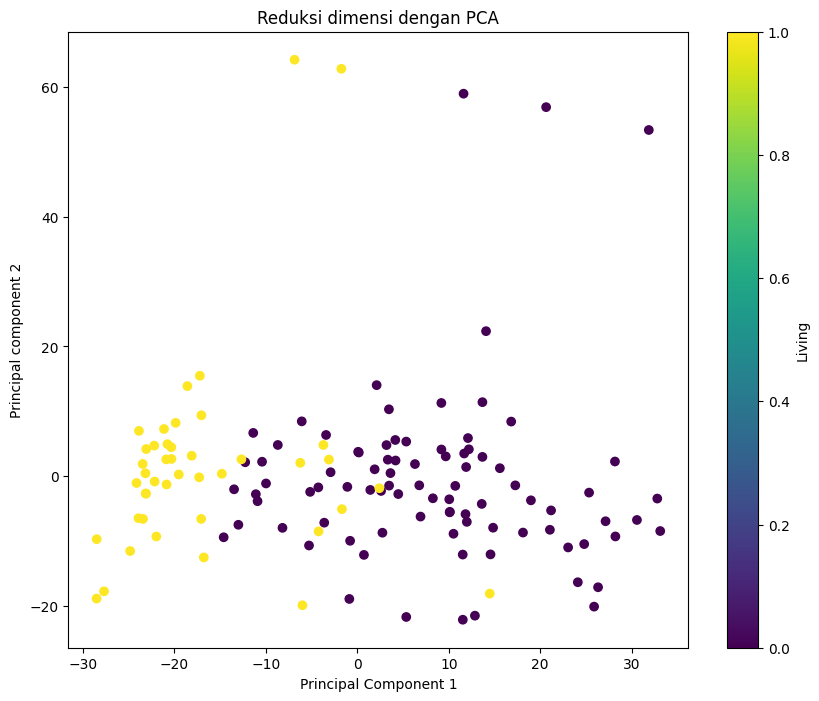

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X)

plt.figure(figsize = (10, 8))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=k, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.title('Reduksi dimensi dengan PCA')
plt.colorbar(label = 'Living')
plt.show()

In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# inisialisasi
oversampler = RandomOverSampler(random_state=30)

undersampler = RandomUnderSampler(random_state=30)

# melakukan
X_resampled, k_resampled = oversampler.fit_resample(X, k)

X_resampled, k_resampled = undersampler.fit_resample(X, k)
print('Jumlah kelas setelah resampling: ')

# menggabungkan data kembali
data_resampled = pd.concat([k_resampled])
print(data_resampled)

Jumlah kelas setelah resampling: 
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
81    1.0
82    1.0
83    1.0
84    1.0
85    1.0
Name: Living, Length: 86, dtype: float64


In [41]:
X = dataku.drop('Living', axis=1)
k = dataku['Living']

In [42]:
#Membagi dataset
X_train, X_test, k_train, k_test = train_test_split(X, k, test_size=0.2, random_state=42)

In [43]:
#Skalakan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Membuat model Regresi Logistik
model = LogisticRegression()

# Melatih model pada data pelatihan
model.fit(X_train, k_train)

LogisticRegression()

In [45]:
X_train, X_test, k_train, k_test = train_test_split(X, k, test_size=0.2, random_state=101)

model = LogisticRegression()
model.fit(X_train, k_train)

predictions = model.predict(X_test)
print(classification_report(k_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
import pickle
# Nama file untuk menyimpan model
model_filename = "logistic_regression_model.sav"

# Menyimpan model ke dalam file menggunakan pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model telah disimpan dalam file", model_filename)

Model telah disimpan dalam file logistic_regression_model.sav


In [54]:
# Nama file model
model_filename = "logistic_regression_model.sav"

# Dapatkan direktori kerja saat ini
current_directory = os.getcwd()

# Gabungkan direktori kerja dengan nama file model
full_model_path = os.path.join(current_directory, model_filename)

print("Model disimpan di:", full_model_path)


Model disimpan di: /content/logistic_regression_model.sav
